# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Users should exercise caution when interpreting the code or results.

## Overview

This dataset contains electrophysiological signals from both healthy and parkinsonian subjects, focusing on signals from the subthalamic nucleus (STN). Signals include Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP). More details can be found at [Neurosift](https://neurosift.app/dandiset/001333).

## What This Notebook Covers

- Loading the Dandiset using the DANDI API
- Exploring NWB file data, particularly Beta Band Voltage
- Visualizing the Beta Band Voltage over time

### Required Packages

The notebook requires the following packages, assumed to be installed: `pynwb`, `h5py`, `remfile`, `matplotlib`, `numpy`.

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

# Connect to DANDI archive to access Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")

# Fetch assets
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 52 assets in the dataset

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Loading the NWB File

We will load and examine the NWB file located at:
`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb`.

URL used: `https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/`

In [2]:
# Load the remote NWB file
url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
nwb_io = pynwb.NWBHDF5IO(file=h5_file)
nwb = nwb_io.read()

# Gathering some metadata
session_description = nwb.session_description
session_start_time = nwb.session_start_time
experiment_description = nwb.experiment_description
print(f"Session Description: {session_description}")
print(f"Session Start Time: {session_start_time}")
print(f"Experiment Description: {experiment_description}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session Start Time: 2025-04-03 12:30:26.094607-04:00
Experiment Description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basal-ganglia is originally presented by Fleming et al. in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease'.


## Visualizing Beta Band Voltage

We will visualize the Beta Band Voltage over time using the NWB file data.

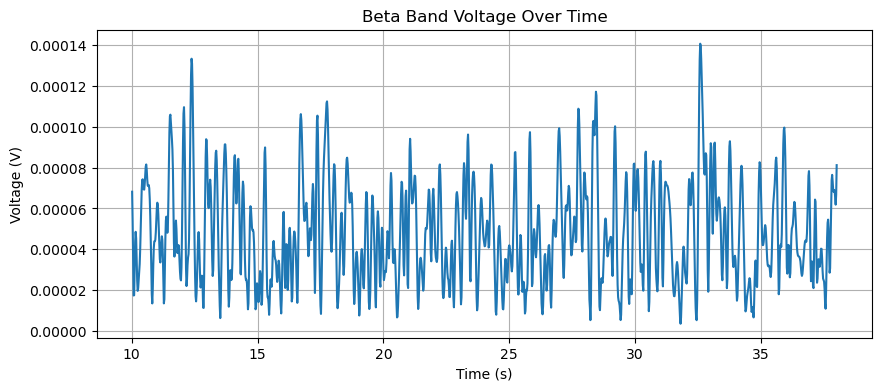

In [3]:
# Accessing Beta_Band_Voltage data
beta_band_voltage = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"]

# Fetching data and timestamps
data = beta_band_voltage.data[:]
timestamps = beta_band_voltage.timestamps[:]

plt.figure(figsize=(10, 4))
plt.plot(timestamps, data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Beta Band Voltage Over Time')
plt.grid(True)
plt.show()

# Close resources
nwb_io.close()
h5_file.close()

## Summary and Future Directions

In this notebook, we explored the Beta Band Voltage signal from the simulated healthy subject in the dataset. Future analysis could include examining other signal types like the ARV or exploring differences between healthy and parkinsonian signals.